In [63]:
import tensorflow as tf
import pickle
import gensim
import re

In [64]:
gen_model = tf.keras.models.load_model('Model/bird_model.h5')

In [65]:
folder = "preprocess/"
data = pickle.load(open(folder+"image_vectors.p", "rb"))
word_vector = pickle.load(open(folder+"word_vector_min_bird.p", "rb"))
model = gensim.models.KeyedVectors.load_word2vec_format(folder+'GoogleNews-vectors-negative300.bin', binary=True)

In [76]:
from keras.preprocessing.image import array_to_img


from numpy import asarray
import numpy as np

import matplotlib.pyplot as pyplot
from keras.preprocessing.image import array_to_img
from numpy import linspace
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

from numpy.random import randint

def create_sent_vector(sent):
  result_array = np.empty((0, 300))

  for word in word_tokenize(sent):
    result_array = np.append(result_array, [model[word]], axis=0)
  final = np.mean(result_array, axis=0).astype('float32')
  return final

def generate_random_word_vectors_from_dataset(n_samples, create_new_captions = False):

  if create_new_captions:
      e = create_sent_vector('This bird has  white breast with brown feathers')
      f = create_sent_vector('This bird has  white breast with blue feathers')
      v = []
      flag = False
      for i in range(n_samples):
        
        if not flag:
          v.append(f)
          flag = True
        elif flag:
          v.append(e)
          flag = False
      return np.asarray(v), np.asarray([])
  else:
    ix = randint(0,len(captions), n_samples)
    print(ix)
    return  np.asarray(captions)[ix], np.asarray(labels)[ix]

def generate_images(model, test_input):

  predictions = model(test_input, training=False)

  print(predictions.shape)
  pyplot.figure(figsize=[15, 15])
  for i in range(predictions.shape[0]):
      pyplot.subplot(1, 9, i+1)
      pyplot.imshow(array_to_img(predictions.numpy()[i]))
      pyplot.axis('off')

  pyplot.show()

# Credit to: https://machinelearningmastery.com/how-to-interpolate-and-perform-vector-arithmetic-with-faces-using-a-generative-adversarial-network/
def interpolate_points(p1, p2, n_steps=9):
	ratios = linspace(0, 1, num=n_steps)
	vectors = list()
	for ratio in ratios:
		v = (1.0 - ratio) * p1 + ratio * p2
		vectors.append(v)
	return np.asarray(vectors)
 
def generate_latent_points(latent_dim, n_samples, interpolate = False):
    x_input  = tf.random.normal([n_samples, latent_dim])
    text_captions, labels = generate_random_word_vectors_from_dataset(n_samples, create_new_captions=False)
    if interpolate:
      text_captions = interpolate_points(text_captions[0], text_captions[1])
      x_input = interpolate_points(x_input[0], x_input[1])
    for index, s in enumerate(labels.flat):
      print(index, s)
    print(text_captions)
    return [x_input, text_captions]



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kashp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# create caption embedding

In [77]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format(folder+'/GoogleNews-vectors-negative300.bin', binary=True)



In [78]:
def clean_and_tokenize_comments_for_image(comment):
    stop_words = ['a', 'and', 'of', 'to']
    punctuation = r"""!"#$%&'()*+,./:;<=>?@[\]^_`…’{|}~"""
    comments_without_punctuation = [s.translate(str.maketrans(' ', ' ', punctuation)) for s in comment]
    sentences = []

    for q_w_c in comments_without_punctuation:
        q_w_c = re.sub(r"-(?:(?<!\b[0-9]{4}-)|(?![0-9]{2}(?:[0-9]{2})?\b))", ' ', q_w_c)  # replace with space

        temp_tokens = word_tokenize(str(q_w_c).lower())
        tokens = [t for t in temp_tokens if t not in stop_words]
        sentences.append(tokens)
    return sentences


In [82]:
def create_feature_vectors_for_single_comment(word2vec_model, cleaned_comments):
    vectorized_list = []
    image_list = []

    for comments in cleaned_comments:
        result_array = np.empty((0, 300))
        for word in comments:
            try:
                w = [word2vec_model[word]]
                result_array = np.append(result_array, w, axis=0)
            except KeyError:
                if word in 'superciliary' or word in 'superciliaries':
                    result_array = np.append(result_array, [word2vec_model['eyebrow']], axis=0)
                    result_array = np.append(result_array, [word2vec_model['region']], axis=0)
                elif word in 'rectrices' or word in 'rectices':
                    result_array = np.append(result_array, [word2vec_model['large']], axis=0)
                    result_array = np.append(result_array, [word2vec_model['tail']], axis=0)
                    result_array = np.append(result_array, [word2vec_model['feathers']], axis=0)
                else:
                    print(word)
                    result_array = np.append(result_array, [word2vec_model[random.choice(word2vec_model.index2entity)]], axis=0)

        vectorized_list.append(np.mean(result_array, axis=0).astype('float32'))

    return image_list, np.array(vectorized_list)

In [83]:
sentence = ["white feathers bird"]

cleaned_captions = clean_and_tokenize_comments_for_image(sentence)


In [84]:
i, captions = create_feature_vectors_for_single_comment(model, cleaned_captions)


[0 0 0 0 0 0 0 0 0]
0 Black_Footed_Albatross_0001_796111.jpg
1 Black_Footed_Albatross_0001_796111.jpg
2 Black_Footed_Albatross_0001_796111.jpg
3 Black_Footed_Albatross_0001_796111.jpg
4 Black_Footed_Albatross_0001_796111.jpg
5 Black_Footed_Albatross_0001_796111.jpg
6 Black_Footed_Albatross_0001_796111.jpg
7 Black_Footed_Albatross_0001_796111.jpg
8 Black_Footed_Albatross_0001_796111.jpg
[[-0.00386556  0.0752767  -0.13273112 ...  0.09423828  0.06327311
  -0.00358073]
 [-0.00386556  0.0752767  -0.13273112 ...  0.09423828  0.06327311
  -0.00358073]
 [-0.00386556  0.0752767  -0.13273112 ...  0.09423828  0.06327311
  -0.00358073]
 ...
 [-0.00386556  0.0752767  -0.13273112 ...  0.09423828  0.06327311
  -0.00358073]
 [-0.00386556  0.0752767  -0.13273112 ...  0.09423828  0.06327311
  -0.00358073]
 [-0.00386556  0.0752767  -0.13273112 ...  0.09423828  0.06327311
  -0.00358073]]
(9, 64, 64, 3)


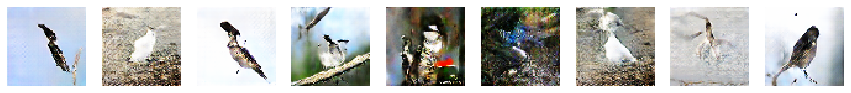

In [85]:
generate_images(gen_model,generate_latent_points(100,9))